 <a href="https://colab.research.google.com/github/geoUFSC/learning/blob/main/Bulbo%20de%20tens%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Bulbo de tensões _(Stress Bulb)_



 Neste exemplo, vamos utilizar a equação de Boussinesq para visualizar o bulbo de tensões, para uma carga pontual no solo. \
 Utilizaremos o ajuste empírico de Fröhlich para observar o efeito de diferentes tipos de solo.

 _In this example, we will use Boussinesq’s equation to visualize the stress bulb generated by a point load on the soil._\
 _We will apply Fröhlich’s empirical adjustment to observe the effect of different soil types._

 ## Pré-requisitos _(Prerequisites)_

 Vamos utilizar os pacotes `numpy` para funções numéricas (ex.: `np.py` para a constante matemática $\pi$) e `plotly` para visualização gráfica.
 _We will use the numpy package for numerical functions (e.g., `np.py` for the mathematical constant $\pi$) and `plotly` for graphical visualization._

In [1]:
%pip install numpy plotly
%pip install anywidget

from ipywidgets import interact
import ipywidgets as widgets
import plotly.graph_objects as go
import plotly.figure_factory as ff
import numpy as np

# Corrige exibição do Plotly no Google Colab 
# Fixes Plotly display in Google Colab
import os
if os.getenv("COLAB_RELEASE_TAG"):
  from google.colab import output
  output.enable_custom_widget_manager()


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.






 ## Equação de Boussinesq _(Boussinesq Equation)_



 ### Exercício _(Exercise)_



 Defina uma função chamada `boussinesq` que calcule a tensão vertical em um ponto `(r, z)` (em m) para uma carga pontual `P` (em tf, kN,...) aplicada no ponto `(0, 0)`, com o fator de correção empírico `nu` (padrão: $\nu$ = 3).\

 _Define a function called `boussinesq` that computes the vertical stress at a point `(r, z)` (in m) for a point load `P` (in tf, kN, ...) applied at `(0, 0)`, including the empirical correction factor `nu` (default: $\nu$ = 3)._

 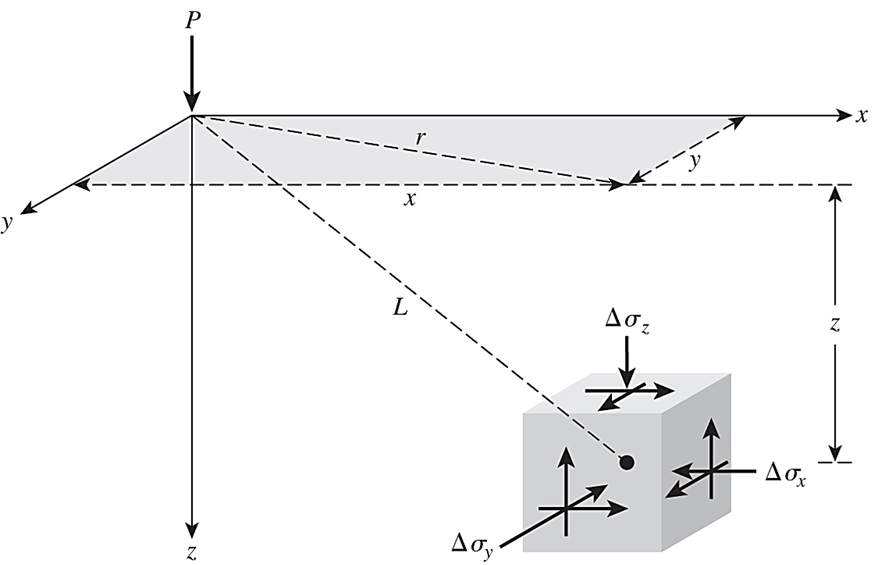

In [2]:
# Boussinesq - tensões vertical no solo para carga pontual 
# Boussinesq - vertical stresses in soil for a point load
def boussinesq_z(P, r, z, nu = 3):
  # Exercício: complete aqui (Exercise: complete here)
  #K = ...
  K = nu/(2*np.pi) * 1 / (1 + (r / z)**2)**((nu+2)/2)

  #sigma_z = ...  # tf/m2
  sigma_z = K * P / (z**2)  # tf/m2

  return sigma_z



 ### Verificações _(Testing)_



 Vamos verificar a implementação para alguns valores esperados. Caso alguma verificação falhe, volte à célula anterior e corrija a função.\

 _We will verify the implementation against a few expected values. If any check fails, go back to the previous cell and fix the function._

In [3]:
# Função auxiliar para comparar o resultado da função com cálculos manuais, com precisão de 4 casas decimais 
# Helper function to compare the function result with manual calculations, with a precision of 4 decimal places
def verifica_se_iguais(x, y):
  np.testing.assert_almost_equal(x, y, decimal=4)

P = 1 # tf
r = 0 # m
z = 1 # m
verifica_se_iguais(boussinesq_z(P, r, z), 0.4775) # tf/m2

P = 10  # tF
r = 0   # m
z = 1   # m
verifica_se_iguais(boussinesq_z(P, r, z), 4.7746) # tf/m2

P = 1 # tf
r = 1 # m
z = 1 # m
verifica_se_iguais(boussinesq_z(P, r, z), 0.0844) # tf/m2

P = 1 # tf
r = 1 # m
z = 2 # m
verifica_se_iguais(boussinesq_z(P, r, z), 0.0683) # tf/m2

# Caso não haja nenhum erro, as verificações foram bem sucedidas
# If no error occurs, the checks were successful "Sucesso!"
print('Sucesso!')


Sucesso!


 ## Visualização _(Visualization)_



 Para visualizar o bulbo de tensões, providenciamos uma função de plotagem que utiliza a função `boussinesq` definida acima para calcular e exibir o bulbo de tensões para diferentes valores de `P` (em tf) e $\nu$.\

 _To visualize the stress bulb, we provide a plotting function that uses the `boussinesq` function defined above to compute and display the stress bulb for different values of `P` (in tf) and $\nu$._

In [4]:
z_ = np.linspace(.001, 3, 100) # m
r_ = np.linspace(-2, 2, 200)  # m
r, z = np.meshgrid(r_, z_)

# Bulbo de tensão / stress bulb
def draw_contour(P, nu, visible=True):
  sigma_z = boussinesq_z(P, r, z, nu)
  return go.Contour(x=r_, y=z_, z=sigma_z, zmin=0, zmax=1, visible=visible)

# Tensão vertical (setas) / vertical stress (quiver)
def draw_quiver(P, nu, z_, visible=True):
  n = 20
  r = np.linspace(-2, 2, n)
  z = z_*np.ones(n)
  sigma_z = boussinesq_z(P, r, z, nu)
  f = ff.create_quiver(x=r, y=z, u=np.zeros(n), v=-10*sigma_z, visible=visible, showlegend=False)
  return f.data[0]

# Prepara os dados para o gráfico interativo
# Prepare data for the interactive plot
step = 0.2
P_values = np.arange(step, 2 + step, step)
start = 4
N = len(P_values)
nu_values = {'argiloso|clay': 3, 'arenoso|sand': 4}
data = { s: [
             *(draw_quiver(P, nu, 1, k == start) for (k,P) in enumerate(P_values)),
             *(draw_quiver(P, nu, 2, k == start) for (k,P) in enumerate(P_values)),
             *(draw_contour(P, nu, k == start) for (k,P) in enumerate(P_values)),
             ]
        for (s, nu) in nu_values.items()
        }

# Cria o gráfico interativo
# Create the interactive plot
fig = go.FigureWidget(
    data=data['argiloso|clay'],
    #frames=[go.Frame(name=s, data=data[s]) for s in data],
    layout = {'width': 800,
              'height': 600,
              'xaxis': {'title': 'r (m)', 'range': [-2, 2], },
              'yaxis': {'title': 'z (m)','range': [3, 0], },
              'title': {'text': 'Tensão vertical | Vertical stress (tf/m²)',
                        'xanchor': 'center', 'x': 0.5},
              'sliders': [{
                  'steps': [{
                      'label': f'{P:.1f}',
                      'method':'update',
                      'args':[{'visible': [*(i == k for i in range(N))]*3}],
                      } for (k,P) in enumerate(P_values)],
                  'active': start,
                  'pad':{"t": 50},
                  }],
              },
              )

# Widget para selecionar o tipo de solo
# Widget to select soil type
material_widget = widgets.Dropdown(options=[('argiloso|clay (ν=3)', 'argiloso|clay'), ('arenoso|sand (ν=4)', 'arenoso|sand')])

# Atualiza o gráfico quando o material é alterado
# Update the plot when the material is changed
@interact(material=material_widget)
def update(material):
  for i in range(0*N, 2*N):
    fig.data[i].y = data[material][i].y
  for i in range(2*N, 3*N):
    fig.data[i].z = data[material][i].z


# Mostra o gráfico
# Show the plot
fig.show()


interactive(children=(Dropdown(description='material', options=(('argiloso|clay (ν=3)', 'argiloso|clay'), ('ar…

FigureWidget({
    'data': [{'mode': 'lines',
              'showlegend': False,
              'type': 'scatter',
              'uid': '63c660b7-45c8-49ea-a85e-2315a5f172ae',
              'visible': False,
              'x': [-2.0, -2.0, None, -1.7894736842105263, -1.7894736842105263,
                    None, -1.5789473684210527, -1.5789473684210527, None,
                    -1.368421052631579, -1.368421052631579, None,
                    -1.1578947368421053, -1.1578947368421053, None,
                    -0.9473684210526316, -0.9473684210526316, None,
                    -0.736842105263158, -0.736842105263158, None,
                    -0.5263157894736843, -0.5263157894736843, None,
                    -0.3157894736842106, -0.3157894736842106, None,
                    -0.10526315789473695, -0.10526315789473695, None,
                    0.10526315789473673, 0.10526315789473673, None,
                    0.3157894736842106, 0.3157894736842106, None,
                    0.526315789

 ##TO-DO:

 - Plots tensão horizontal, cisalhamento, recalque _Plots for horizontal stress, shear stress, settlement_

 - Cículo de Mohr (ao clicar em um ponto) _Mohr’s Circle (when clicking on a point)_

 ---

 ---

 #### **PROJETO: REPOSITÓRIO PYTHON PARA GEOTECNIA _(PYTHON REPOSITORY FOR GEOTECHNICS)_**

 Este repositório faz parte do projeto de extensão da **Universidade Federal de Santa Catarina** (UFSC) denominado **"Repositório Python para Geotecnia"**, cujo objetivo é desenvolver e compartilhar scripts interativos de geotecnia.\

 _This repostitory is part of the extension project of the **Federal University of Santa Catarina** (UFSC) called **"Python Repository for Geotechnics"**, which aims to develop and share interactive scripts for geotechnical engineering._



 ##### **Contato: _(Contact:)_**

 - Prof. Stephanie Thiesen* (coordenadora/_coordinator_): `stephanie.thiesen@ufsc.br` \

  *Para sugestões, entre em contato pelo e-mail \

 _*For suggestions, please contact via e-mail_



 **Isenção de Responsabilidade:**

 Os autores deste projeto não se responsabilizam por quaisquer usos indevidos, imprecisões ou danos resultantes da aplicação dos scripts e funções contidos neste repositório. O uso dos materiais é de responsabilidade exclusiva do usuário. \

 **_Disclaimer:_** _The authors of this project are not responsible for any misuse, inaccuracies, or damages resulting from the application of the scripts and functions contained in this repository. The use of the materials is the sole responsibility of the user._



 ---

 ---